# Crimes Data in Israel (2019-2024)

#### by: Eden Smuel, Oriana Feltzer

***

Import Required Libraries

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Define Paths to Crime Datasets (2019–2024)

In [3]:
path_2019 = "C:/Users/edenn/Machine Learning/4_Year/Task/crimes2019.csv"
path_2020 = "C:/Users/edenn/Machine Learning/4_Year/Task/crimes2020.csv"
path_2021 = "C:/Users/edenn/Machine Learning/4_Year/Task/crimes2021.csv" 
path_2022 = "C:/Users/edenn/Machine Learning/4_Year/Task/crimes2022.csv"
path_2023 = "C:/Users/edenn/Machine Learning/4_Year/Task/crimes2023.csv"
path_2024 = "C:/Users/edenn/Machine Learning/4_Year/Task/crimes2024.csv"

Load Crime Data into Pandas DataFrames

In [4]:
Crimes_2019 = pd.read_csv(path_2019)
Crimes_2020 = pd.read_csv(path_2020)
Crimes_2021 = pd.read_csv(path_2021)
Crimes_2022 = pd.read_csv(path_2022)
Crimes_2023 = pd.read_csv(path_2023)
Crimes_2024 = pd.read_csv(path_2024)

Preview 2019 Crime Data

In [5]:
Crimes_2019.head()

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,9DF96CE4D6AB4649CECEAEFBAF3AF07C,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000222.0,אושיות,700,עבירות כלפי הרכוש,715,גניבות אחרות
1,BA008B3B18529E6E4C831139FDA8B172,2019,Q4,510.0,כפר מנדא,10000000,מחוז צפון,15002736,מרחב גליל צפון,12401000,תחנת משגב גליל צפון,NaN,NaN,NaN,NaN,600,עבירות כלפי המוסר,608,שמוש בסמים מסוכנים
2,1905BE9ECCA0AEDA4C4D13705F7A5672,2019,Q3,7000.0,לוד,40000000,מחוז מרכז,41200000,מרחב שפלה,41213000,תחנת לוד שפלה,NaN,NaN,70000022.0,גבעת הזיתים,700,עבירות כלפי הרכוש,712,גניבה מתוך רכב
3,5843D35EBA3C57AADF22435516ACD203,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000116.0,החלוץ/ העבודה,200,עבירות סדר ציבורי,220,עבירות על חוק הכניסה לישראל
4,BFF2C9D05A0250AFB2A4CB985FF2FA62,2019,Q1,6900.0,כפר סבא,40000000,מחוז מרכז,41100000,מרחב שרון,41112000,תחנת כפר סבא שרון,NaN,NaN,NaN,NaN,700,עבירות כלפי הרכוש,723,גניבת חלקי רכב


In [6]:
datasets = [Crimes_2019, Crimes_2020, Crimes_2021, Crimes_2022, Crimes_2023, Crimes_2024]
combined_data = pd.concat(datasets, axis=0, ignore_index=True)
combined_data

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,9DF96CE4D6AB4649CECEAEFBAF3AF07C,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000222.0,אושיות,700,עבירות כלפי הרכוש,715,גניבות אחרות
1,BA008B3B18529E6E4C831139FDA8B172,2019,Q4,510.0,כפר מנדא,10000000,מחוז צפון,15002736,מרחב גליל צפון,12401000,תחנת משגב גליל צפון,NaN,NaN,NaN,NaN,600,עבירות כלפי המוסר,608,שמוש בסמים מסוכנים
2,1905BE9ECCA0AEDA4C4D13705F7A5672,2019,Q3,7000.0,לוד,40000000,מחוז מרכז,41200000,מרחב שפלה,41213000,תחנת לוד שפלה,NaN,NaN,70000022.0,גבעת הזיתים,700,עבירות כלפי הרכוש,712,גניבה מתוך רכב
3,5843D35EBA3C57AADF22435516ACD203,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000116.0,החלוץ/ העבודה,200,עבירות סדר ציבורי,220,עבירות על חוק הכניסה לישראל
4,BFF2C9D05A0250AFB2A4CB985FF2FA62,2019,Q1,6900.0,כפר סבא,40000000,מחוז מרכז,41100000,מרחב שרון,41112000,תחנת כפר סבא שרון,NaN,NaN,NaN,NaN,700,עבירות כלפי הרכוש,723,גניבת חלקי רכב
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341168,6E8F18B17F7151EC63D7D4F44322987E,2024,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000412.0,מתחם התחנה המרכזית,700,עבירות כלפי הרכוש,715,גניבות אחרות
2341169,08A5DB64599E5C70576C65E26E59E322,2024,Q3,6800.0,קרית אתא,80000000,מחוז חוף,15002761,מרחב אשר חוף,81200000,תחנת זבולון מחוז חוף,NaN,NaN,68000022.0,מרכז (דרום),200,עבירות סדר ציבורי,204,הסגות גבול
2341170,47A5AAD64C1A7B4202100C6F0AF18A22,2024,Q2,4000.0,חיפה,80000000,מחוז חוף,15005216,מרחב כרמל חוף,81100000,תחנת חיפה מחוז חוף,NaN,NaN,40000324.0,העיר התחתית (מרכז) - שער פלמר,700,עבירות כלפי הרכוש,715,גניבות אחרות
2341171,85B2165F22CD8768CC923507129E56B2,2024,Q1,2610.0,בית שמש,50000000,מחוז ירושלים,51200000,מרחב ציון ירושלים,51215000,תחנת בית שמש ציון,NaN,NaN,26100038.0,רמת בית שמש ג',800,עבירות מרמה,803,מרמה ועושק


בדיקת חריגים לפני חלוקה לאימון ומבחן

In [7]:
# מבנה הנתונים
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341173 entries, 0 to 2341172
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FictiveIDNumber    object 
 1   Year               int64  
 2   Quarter            object 
 3   YeshuvKod          float64
 4   Yeshuv             object 
 5   PoliceDistrictKod  int64  
 6   PoliceDistrict     object 
 7   PoliceMerhavKod    int64  
 8   PoliceMerhav       object 
 9   PoliceStationKod   int64  
 10  PoliceStation      object 
 11  municipalKod       float64
 12  municipalName      object 
 13  StatisticAreaKod   float64
 14  StatisticArea      object 
 15  StatisticGroupKod  int64  
 16  StatisticGroup     object 
 17  StatisticTypeKod   int64  
 18  StatisticType      object 
dtypes: float64(3), int64(6), object(10)
memory usage: 339.4+ MB


In [8]:
# בדיקת הערכים החסרים
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FictiveIDNumber            0
Year                       0
Quarter                    0
YeshuvKod             310821
Yeshuv                310821
PoliceDistrictKod          0
PoliceDistrict             0
PoliceMerhavKod            0
PoliceMerhav               0
PoliceStationKod           0
PoliceStation              0
municipalKod         2161822
municipalName        2010942
StatisticAreaKod      860641
StatisticArea         960580
StatisticGroupKod          0
StatisticGroup             0
StatisticTypeKod           0
StatisticType              0
dtype: int64


In [9]:
# תיאור סטטיסטי של הנתונים
combined_data.describe()

,Year,YeshuvKod,PoliceDistrictKod,PoliceMerhavKod,PoliceStationKod,municipalKod,StatisticAreaKod,StatisticGroupKod,StatisticTypeKod
count,2.341173e+06,2.030352e+06,2.341173e+06,2.341173e+06,2.341173e+06,179351.000000,1.480532e+06,2.341173e+06,2.341173e+06
mean,2.021394e+03,4.687374e+03,3.905999e+07,3.158307e+07,3.699085e+07,35.749781,5.303095e+07,5.318704e+02,5.418855e+02
std,1.650468e+00,2.937389e+03,2.206618e+07,1.543080e+07,2.161290e+07,25.367089,2.742216e+07,8.647978e+02,8.669626e+02
min,2.019000e+03,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.100010e+05,-1.000000e+00,-1.000000e+00
25%,2.020000e+03,2.600000e+03,2.000000e+07,1.500522e+07,1.500571e+07,15.000000,3.000092e+07,2.000000e+02,2.120000e+02
50%,2.021000e+03,5.000000e+03,3.000000e+07,3.120000e+07,3.131300e+07,30.000000,5.000093e+07,4.000000e+02,4.040000e+02
75%,2.023000e+03,7.400000e+03,5.000000e+07,4.120000e+07,5.121000e+07,53.000000,7.700002e+07,7.000000e+02,7.150000e+02
max,2.024000e+03,9.800000e+03,8.000000e+07,7.150000e+07,8.170000e+07,100.000000,9.800000e+07,1.000000e+04,1.003900e+04


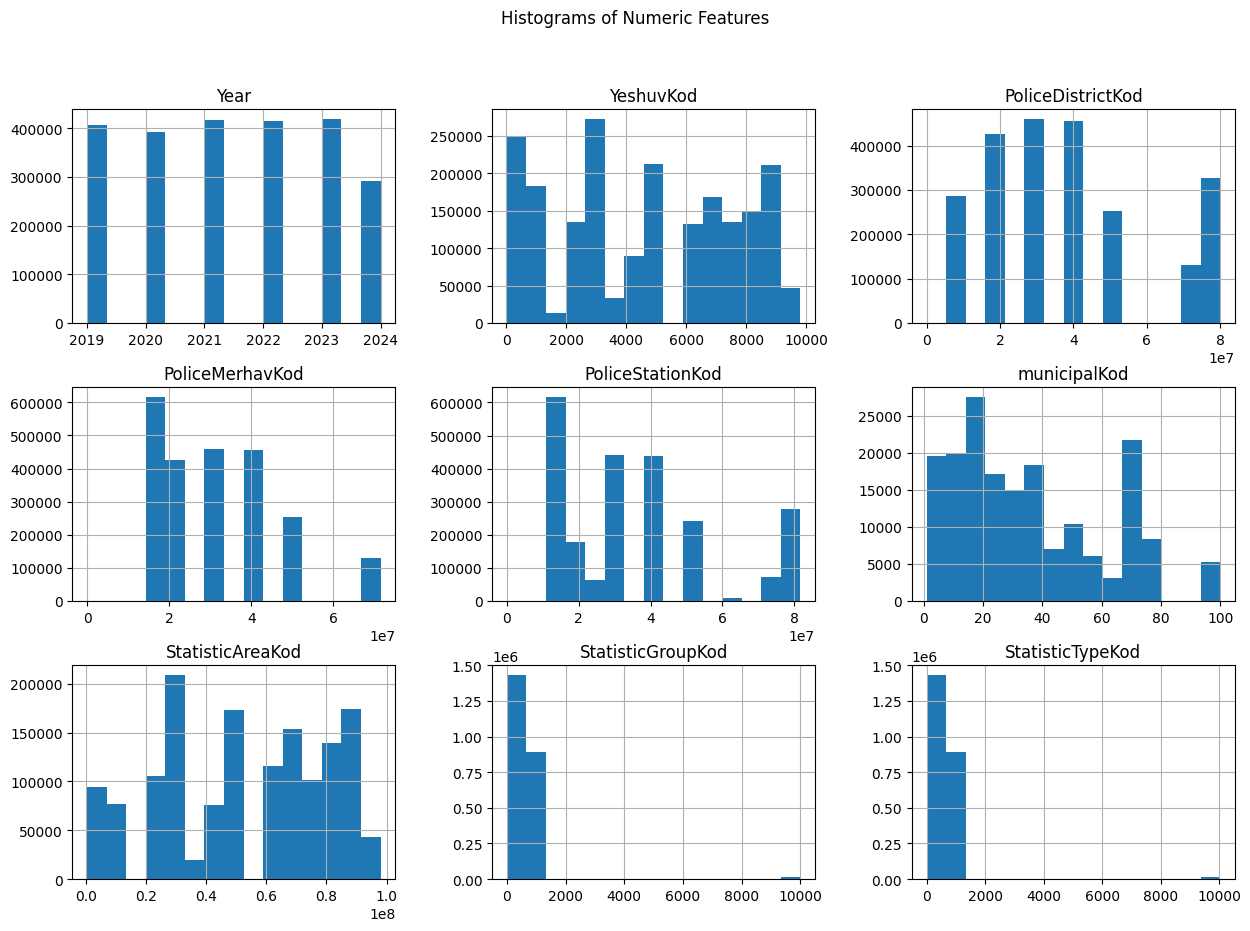

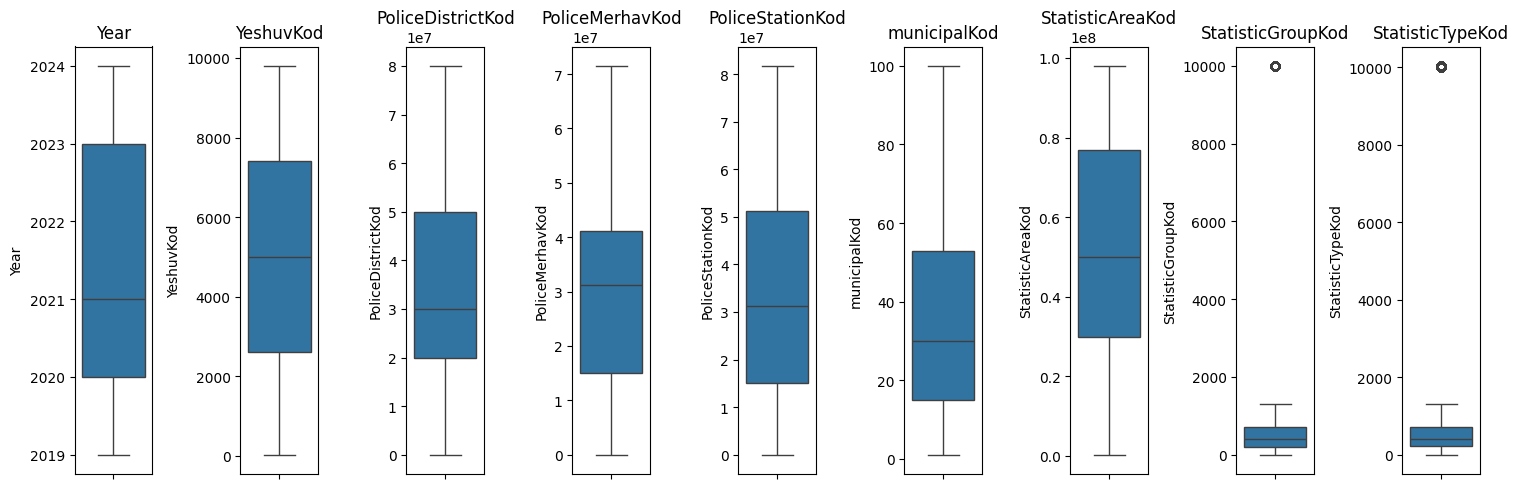

In [10]:
# התפלגות משתנים מספריים
numeric_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# יצירת היסטוגרמות
combined_data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# זיהוי חריגים עם Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(y=combined_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


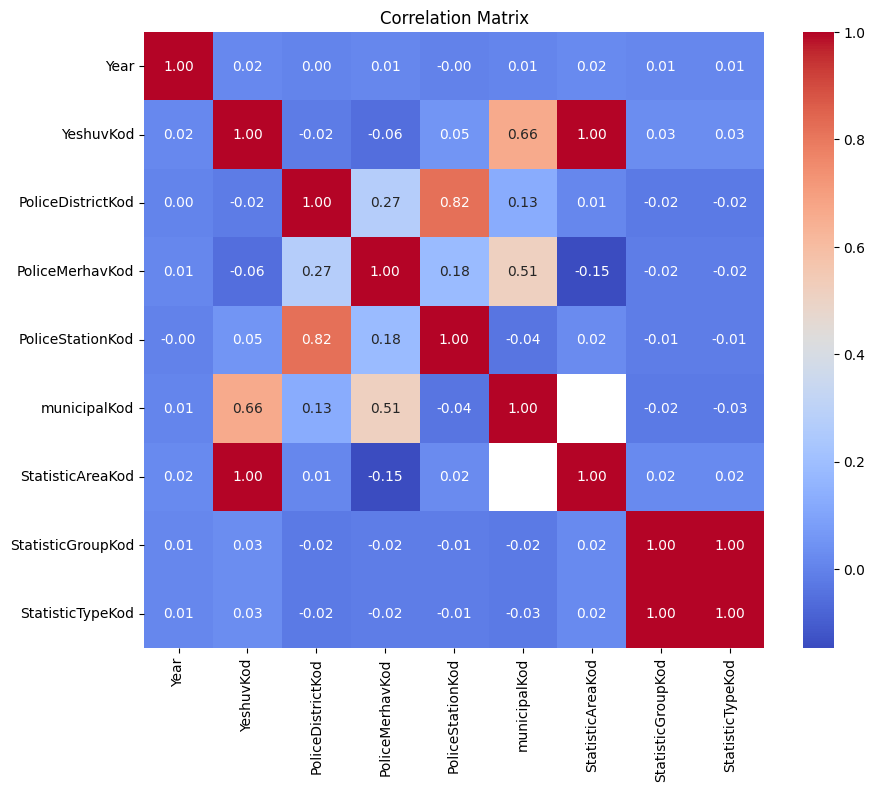

In [11]:
# מטריצת קורלציה
correlation_matrix = combined_data[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [12]:
# זיהוי קטגוריות נדירות עבור StatisticType
rare_statistic_type = combined_data['StatisticType'].value_counts()
rare_statistic_type = rare_statistic_type[rare_statistic_type < 10]  # פחות מ-10 שורות

# זיהוי קטגוריות נדירות עבור StatisticGroup
rare_statistic_group = combined_data['StatisticGroup'].value_counts()
rare_statistic_group = rare_statistic_group[rare_statistic_group < 10]  # פחות מ-10 שורות

print("Rare categories in StatisticType:\n", rare_statistic_type)
print("Rare categories in StatisticGroup:\n", rare_statistic_group)


Rare categories in StatisticType:
 StatisticType
אי מתן זכות קדימה להולך רגל    7
גרימת מות ברשלנות - ת.ד.       7
אי ציות לתמרור זכות קדימה      6
עבירות ביחס לשירות הבטחון      6
הנמצא מזוין לבצוע פשע          6
חוסר תאורה                     6
הקמת מחסום - בטחון             5
מטען שלא כחוק                  4
בלמים בלתי תקינים              4
השלכת בקבוק תבערה              3
השכלה גבוהה                    3
אי ציות לחיצי נתיבים           3
התנהגות הולכי רגל              3
שאר עבירות נגד המוסר           2
איום ברצח                      1
שוטטות למטרת זנות              1
איתות                          1
הנפת דגל פלסטין                1
Name: count, dtype: int64
Rare categories in StatisticGroup:
 Series([], Name: count, dtype: int64)


In [13]:
# מחיקת שורות עם קטגוריות נדירות ב-StatisticType
combined_data = combined_data[~combined_data['StatisticType'].isin(rare_statistic_type.index)]

חלוקת הנתונים

In [15]:
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42, stratify=combined_data['StatisticGroup'])

In [16]:
datasets = train_data.copy()

In [19]:
def Preprocessing(datasets):
    #Analyze Missing Data for Each Year:
    missing_data_report = pd.DataFrame({
    'Missing Values': datasets.isnull().sum(),
    'Missing Percentage': (datasets.isnull().sum() / len(datasets)) * 100})
    print(missing_data_report)

    #We will remove the columns "municipalKod" and "municipalName" because more than 85% of the data are missing values.
    columns_to_remove_85 = ['municipalKod', 'municipalName']
    datasets = datasets.drop(columns=columns_to_remove_85, errors='ignore')

    #We removed the columns "PoliceMerhavKod", "PoliceDistrictKod", and "PoliceStationKod" because they are either redundant, irrelevant to the analysis.
    columns_to_remove_redundant = ['PoliceMerhavKod', 'PoliceDistrictKod', 'PoliceStationKod']
    datasets = datasets.drop(columns=columns_to_remove_redundant, errors='ignore')

    # We created mappings between "StatisticAreaKod" and "StatisticArea", and between "YeshuvKod" and "Yeshuv"
    # using all the combined data. These mappings are then applied to fill missing values in the respective columns for each dataset.
    statistic_area_mapping = datasets.dropna(subset=['StatisticArea']).set_index('StatisticAreaKod')['StatisticArea'].to_dict()
    yeshuv_mapping = datasets.dropna(subset=['Yeshuv']).set_index('YeshuvKod')['Yeshuv'].to_dict()

    datasets['StatisticArea'] = datasets['StatisticArea'].fillna(datasets['StatisticAreaKod'].map(statistic_area_mapping))
    datasets['Yeshuv'] = datasets['Yeshuv'].fillna(datasets['YeshuvKod'].map(yeshuv_mapping))


    #We attempted to fill the missing values in "StatisticArea" and "Yeshuv" using mappings, but this approach did not resolve the missing data.
    #Since the missing values in "StatisticArea" and "Yeshuv" could not be filled using their respective codes, 
    #we decided to remove the columns "YeshuvKod" and "StatisticAreaKod" as they are no longer useful.
    columns_to_remove_after_fill = ['StatisticAreaKod', 'YeshuvKod']
    datasets = datasets.drop(columns=columns_to_remove_after_fill, errors='ignore')

    #We filled the missing values in each dataset's "StatisticArea" column by mapping the most common "StatisticArea" within each "PoliceDistrict". 
    #Additionally, we added an indicator column, "is_missing_StatisticArea", to track rows where data was originally missing.

    datasets['is_missing_StatisticArea'] = datasets['StatisticArea'].isnull().astype(int)

    statistic_area_map = datasets.groupby('PoliceDistrict')['StatisticArea'].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
    datasets['StatisticArea'] = datasets['StatisticArea'].fillna(datasets['PoliceDistrict'].map(statistic_area_map))

    #We checked for duplicates using the 'FictiveIDNumber' column, which uniquely identifies complaints. We noticed some complaints sharing the same 'FictiveIDNumber'. 
    #However, upon closer inspection, we found that these rows represent the same complainant reporting multiple charges in the StatisticGroup. 
    #To handle this, we can apply one-hot encoding to the StatisticGroup column, allowing each charge to be represented as a separate feature.

    #Outliers
    #From looking in the data, we show that the value "-1" in the "kod" columns represents a type error, so we will remove all the lines with "-1".
    columns_to_check = [   
        'StatisticGroupKod', 
        'StatisticTypeKod']

    datasets = datasets[~datasets[columns_to_check].eq(-1).any(axis=1)]

    #Encoding the Data
    categorical_columns = ['Yeshuv', 'PoliceDistrict', 'PoliceMerhav', 'PoliceStation', 'StatisticGroup', 'StatisticType']
    data_encoded = pd.get_dummies(datasets, columns=categorical_columns, drop_first=True)

    #Removing the duplicaite rows
    data_encoded = data_encoded.drop_duplicates()

    #Feature Engineering
    data_Feature = data_encoded.copy()

    data_Feature['Season'] = data_Feature['Quarter'].map({'Q1': 'Winter', 'Q2': 'Spring', 'Q3': 'Summer', 'Q4': 'Fall'})
    data_Feature['Quarter_numeric'] = data_Feature['Quarter'].str.extract('(\d)').astype(int)
    data_Feature['Quarter_sin'] = np.sin(2 * np.pi * data_Feature['Quarter_numeric'].astype(int) / 4)
    data_Feature['Quarter_cos'] = np.cos(2 * np.pi * data_Feature['Quarter_numeric'].astype(int) / 4)

    data_Feature['YeshuvCrimeRate'] = datasets.groupby('Yeshuv')['Yeshuv'].transform('count')
    data_Feature['CrimesByStatisticGroup'] = datasets.groupby('StatisticGroup')['StatisticGroup'].transform('count')
    data_Feature['YearQuarter'] = datasets['Year'].astype(str) + "-" + datasets['Quarter']
    data_Feature['CrimeTrend'] = data_Feature.groupby('YearQuarter')['YearQuarter'].transform('count')

    scaler = MinMaxScaler()
    numeric_columns = ['YeshuvCrimeRate', 'CrimeTrend', 'CrimesByStatisticGroup']
    data_Feature[numeric_columns] = scaler.fit_transform(data_Feature[numeric_columns])


    return data_Feature
    

In [20]:
Preprocessing(datasets)

                   Missing Values  Missing Percentage
FictiveIDNumber                 0            0.000000
Year                            0            0.000000
Quarter                         0            0.000000
YeshuvKod                  248614           13.274401
Yeshuv                     248614           13.274401
PoliceDistrictKod               0            0.000000
PoliceDistrict                  0            0.000000
PoliceMerhavKod                 0            0.000000
PoliceMerhav                    0            0.000000
PoliceStationKod                0            0.000000
PoliceStation                   0            0.000000
municipalKod              1729602           92.349709
municipalName             1608739           85.896396
StatisticAreaKod           688527           36.762948
StatisticArea              768169           41.015322
StatisticGroupKod               0            0.000000
StatisticGroup                  0            0.000000
StatisticTypeKod            

,FictiveIDNumber,Year,Quarter,StatisticArea,StatisticGroupKod,StatisticTypeKod,is_missing_StatisticArea,Yeshuv_אבו סנאן,Yeshuv_אבן יהודה,Yeshuv_אולפני נווה אילן,...,StatisticType_תקיפת עובדי צבור בתפקיד,StatisticType_תקיפת שוטר בנסיבות חמורות,Season,Quarter_numeric,Quarter_sin,Quarter_cos,YeshuvCrimeRate,CrimesByStatisticGroup,YearQuarter,CrimeTrend
15682,5A335B60C68539422C06234BBB599E96,2019,Q4,הדר עליון (מערב),700,707,0,False,False,False,...,False,False,Fall,4,-2.449294e-16,1.000000e+00,0.394983,0.939605,2019-Q4,0.025590
1318448,083FAA6282E9A966BF1C4F1F339E91C1,2022,Q4,ברנע ב' ברנע ג' רמת כרמים,400,404,0,False,False,False,...,False,False,Fall,4,-2.449294e-16,1.000000e+00,0.214724,0.439900,2022-Q4,0.579513
1340273,47AC5D9EEA65761575813C604BADF3BF,2022,Q1,העיר העתיקה מרכז אזרחי,200,206,1,False,False,False,...,False,False,Winter,1,1.000000e+00,6.123234e-17,NaN,1.000000,2022-Q1,0.640213
589987,CF8CC352EC1C29148AC3CC6C41B0B1C1,2020,Q2,עפולה תחתית (צפון),700,715,1,False,False,False,...,False,False,Spring,2,1.224647e-16,-1.000000e+00,NaN,0.939605,2020-Q2,0.088271
1410305,53E1520FF9330C835A7C8AB3363E72F9,2022,Q2,מתחם הרכבת אזור התעשייה הצפוני,400,404,0,False,False,False,...,False,False,Spring,2,1.224647e-16,-1.000000e+00,0.105461,0.439900,2022-Q2,0.541127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474119,6EAC311382C13A644D6E68D6C32A634F,2020,Q3,עכו הוותיקה,200,216,0,False,False,False,...,False,False,Summer,3,-1.000000e+00,-1.836970e-16,0.100624,1.000000,2020-Q3,0.333206
1783116,256D707A4048DDBF9DB2C416811FA92D,2023,Q2,נוף שאן נוף גנים נוף הגלבוע,700,715,0,False,False,False,...,False,False,Spring,2,1.224647e-16,-1.000000e+00,0.029676,0.939605,2023-Q2,0.728104
22187,D88CCCEA828C4D155B7390DF4C56BBE0,2019,Q1,תלפיות (מערב),600,609,0,False,False,False,...,False,False,Winter,1,1.000000e+00,6.123234e-17,0.949365,0.178915,2019-Q1,0.730388
270057,0356E6912FEC15081988E76143ED66F1,2019,Q3,העיר העתיקה מרכז אזרחי,400,404,1,False,False,False,...,False,False,Summer,3,-1.000000e+00,-1.836970e-16,NaN,0.439900,2019-Q3,0.573115


In [ ]:
# missing_data_report = pd.DataFrame({
#     'Missing Values': train_data.isnull().sum(),
#     'Missing Percentage': (train_data.isnull().sum() / len(train_data)) * 100})
# print(missing_data_report)

We will remove the columns "municipalKod" and "municipalName" because more than 85% of the data are missing values. 

In [ ]:
# for i, df in enumerate(datasets):
#     datasets[i] = df.drop(columns=['municipalKod', 'municipalName'], errors='ignore')

We removed the columns "PoliceMerhavKod", "PoliceDistrictKod", and "PoliceStationKod" because they are either redundant, irrelevant to the analysis. 

In [ ]:
# columns_to_remove = ['PoliceMerhavKod', 'PoliceDistrictKod', 'PoliceStationKod']

# for i, df in enumerate(datasets):
#     datasets[i] = df.drop(columns=columns_to_remove, errors='ignore')

We created a mapping between "StatisticAreaKod" and "StatisticArea" using all the combined data. Then, we applied this mapping to fill missing values in the "StatisticArea" column for each dataset.

In [ ]:
# combined_data = pd.concat(datasets, axis=0, ignore_index=True)
# statistic_area_mapping = combined_data.dropna(subset=['StatisticArea']).set_index('StatisticAreaKod')['StatisticArea'].to_dict()

# def fill_statistic_area(row):
#     if pd.isna(row['StatisticArea']):
#         return statistic_area_mapping.get(row['StatisticAreaKod'], row['StatisticArea'])
#     return row['StatisticArea']

# for i, df in enumerate(datasets):
#     df['StatisticArea'] = df.apply(fill_statistic_area, axis=1)
#     #print(f"Missing values in 'StatisticArea' after filling for {years[i]}: {df['StatisticArea'].isna().sum()}")

We will try to do the same for "YeshuvKod" and "Yeshuv".

In [ ]:
# yeshuv_mapping = combined_data.dropna(subset=['Yeshuv']).set_index('YeshuvKod')['Yeshuv'].to_dict()

# def fill_yeshuv(row):
#     if pd.isna(row['Yeshuv']):
#         return yeshuv_mapping.get(row['YeshuvKod'], row['Yeshuv'])
#     return row['Yeshuv']

# for i, df in enumerate(datasets):
#     df['Yeshuv'] = df.apply(fill_yeshuv, axis=1)
#     print(f"Missing values in 'Yeshuv' after filling for {years[i]}: {df['Yeshuv'].isna().sum()}")

We attempted to fill the missing values in "StatisticArea" and "Yeshuv" using mappings, but this approach did not successfully resolve the missing data.

*****

Since the missing values in "StatisticArea" and "Yeshuv" could not be filled using their respective codes, we decided to remove the columns "YeshuvKod" and "StatisticAreaKod" as they are no longer useful.

In [ ]:
# for i, df in enumerate(datasets):
#     datasets[i] = df.drop(columns=['StatisticAreaKod', 'YeshuvKod'], errors='ignore')

We decided to remove all rows with missing values in the "Yeshuv" column since the number of missing rows is small and does not significantly impact the dataset.

In [ ]:
# for i, df in enumerate(datasets):
#     datasets[i] = df[df['Yeshuv'].notna()]
#     print(f"Year {years[i]} - Remaining rows after removing missing 'Yeshuv': {datasets[i].shape[0]}")

We filled the missing values in each dataset's "StatisticArea" column by mapping the most common "StatisticArea" within each "PoliceDistrict". Additionally, we added an indicator column, "is_missing_StatisticArea", to track rows where data was originally missing.

In [ ]:
# for i, df in enumerate(datasets):
#     df['is_missing_StatisticArea'] = df['StatisticArea'].isnull().astype(int)
    
#     statistic_area_map = df.groupby('PoliceDistrict')['StatisticArea'].apply(
#         lambda x: x.mode().iloc[0] if not x.mode().empty else None
#     ).to_dict()
    
#     df['StatisticArea'] = df.apply(
#         lambda row: statistic_area_map[row['PoliceDistrict']] if pd.isna(row['StatisticArea']) else row['StatisticArea'],
#         axis=1
#     )

In [ ]:
# missing_data_summary = {year: df.isnull().sum().sort_values(ascending=False) for year, df in zip(years, datasets)}
# for year, missing_data in missing_data_summary.items():
#     print(f"Missing Data for {year}:\n{missing_data}\n")

We combined all cleaned yearly datasets into a single DataFrame for further analysis and processing.

In [ ]:
# combined_data = pd.concat(datasets, axis=0, ignore_index=True)
# combined_data

We checked for duplicates using the 'FictiveIDNumber' column, which uniquely identifies complaints. We noticed some complaints sharing the same 'FictiveIDNumber'. However, upon closer inspection, we found that these rows represent the same complainant reporting multiple charges in the StatisticGroup. To handle this, we can apply one-hot encoding to the StatisticGroup column, allowing each charge to be represented as a separate feature

### Data distribution visualization

In [ ]:
crime_per_year = combined_data['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(crime_per_year.index, crime_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes Per Year')
plt.show()


In [ ]:
# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only

# Find the top N StatisticType categories by count
top_N = 10  # Adjust N as needed
top_types = combined_data['StatisticGroup'].value_counts().head(top_N).index

# Filter the DataFrame to include only these top categories
filtered_df = combined_data[combined_data['StatisticGroup'].isin(top_types)].copy()

# Apply the reverse function only to the 'StatisticType' column
filtered_df['StatisticGroup'] = filtered_df['StatisticGroup'].apply(reverse_hebrew_text)

# Group data by quarter and StatisticType
crime_grouped = filtered_df.groupby(['Quarter', 'StatisticGroup']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 7))
sns.barplot(data=crime_grouped, x='Quarter', y='count', hue='StatisticGroup', palette='tab20')

# Add labels and titles
plt.rcParams['font.family'] = 'Arial'
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.title(f'Top {top_N} StatisticGroup per Quarter')
plt.legend(title='StatisticGroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Outlier

In [ ]:
# ראינו שאין חריגים שהם שגויים. יש חריגים שהם נדירים ובחרנו להשאיר אותם בנתונים. 

In [ ]:
# # עמודות לבדיקה
# columns_to_check = ['Yeshuv', 'PoliceDistrict', 'PoliceMerhav', 
#                     'PoliceStation', 'StatisticGroup', 'StatisticType']

# # תדירות הערכים לכל עמודה
# outliers_report = {}

# for column in columns_to_check:
#     value_counts = combined_data[column].value_counts()
#     outliers_report[column] = value_counts

# # הצגת הדוחות
# outliers_report

In [ ]:
# # הצגת ערכים ייחודיים לכל עמודה
# for column in columns_to_check:
#     unique_values = combined_data[column].unique()
#     print(f"ערכים ייחודיים בעמודה {column}:\n{unique_values}\n")

# Encoding the Data

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# categorical_columns = ['Yeshuv', 'PoliceDistrict', 'PoliceMerhav', 'PoliceStation', 'StatisticGroup', 'StatisticType']
# data_encoded = pd.get_dummies(combined_data, columns=categorical_columns, drop_first=True)

In [ ]:
data_encoded

# Removing the duplicaite rows

In [ ]:
# data_encoded = data_encoded.drop_duplicates()

# Feature Engineering

נמיר את הרבעונים שלנו לטייפ מחזורי כדי שהמודל ידע להבין שזה מחזורי שיש קשר מרבעון 1 לרבעון 4 והם לא רק מספרים רחוקים. 

In [ ]:
# data_Feature = data_encoded.copy()

# data_Feature['Season'] = data_Feature['Quarter'].map({'Q1': 'Winter', 'Q2': 'Spring', 'Q3': 'Summer', 'Q4': 'Fall'})
# data_Feature['Quarter_numeric'] = data_Feature['Quarter'].str.extract('(\d)').astype(int)

# data_Feature['Quarter_sin'] = np.sin(2 * np.pi * data_Feature['Quarter_numeric'].astype(int) / 4)
# data_Feature['Quarter_cos'] = np.cos(2 * np.pi * data_Feature['Quarter_numeric'].astype(int) / 4)

# data_Feature

In [ ]:
# data_Feature['YeshuvCrimeRate'] = combined_data.groupby('Yeshuv')['Yeshuv'].transform('count')

In [ ]:
# data_Feature['CrimesByStatisticGroup'] = combined_data.groupby('StatisticGroup')['StatisticGroup'].transform('count')

In [ ]:
# data_Feature['YearQuarter'] = combined_data['Year'].astype(str) + "-" + combined_data['Quarter']

In [ ]:
# data_Feature['CrimeTrend'] = data_Feature.groupby('YearQuarter')['YearQuarter'].transform('count')

In [ ]:
data_Feature

נירמול

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data_Feature[['YeshuvCrimeRate', 'CrimeTrend', 'CrimesByStatisticGroup', 'CrimesByStatisticType']] = scaler.fit_transform(data_Feature[['YeshuvCrimeRate', 
#                                                                                                                                         'CrimeTrend', 'CrimesByStatisticGroup', 'CrimesByStatisticType']])